## Predicting Customer Churn

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Custom module imports
import acquire
import prepare
import explore
# from model import score_models

### Project Planning

- Project Description
Telco is attempting to figure out the drivers of churn amongst its customers. Churn is defined as when a customer leaves the company.

- Goals
    - Find drivers for customer churn at Telco.
    - Construct a ML classification model that accurately predicts customer churn.
    - Provide my findings and takeaways in a report.
    
- Pipeline Tasks
    - Acquiring the data from the codeup database
    - Taking appropriate steps to clean the dataset
    - Splitting the data into train, validate and test dataframes
    - Exploring the data to aid in feature selection
    - Creating and fitting models utilizing various classification algorithms on in sample data
    - Testing the models' accuracies on out of sample data (i.e. the validate split)
    - Selecting the best performing model and evaluating its performance on the test split
    
- Data Dictionary

- Starting Hypotheses
- Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create csv file with the customer id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

### Executive Summary - Conclusions & Next Steps¶

- I found that all of the classification models I created, LogisticRegression, DecisionTree, RandomForest, and KNeighbors predicted the species of Iris equally well using the features sepal_width, sepal_length, petal_length, petal_width.
- I chose my DecisionTree model as my best model with a 90% accuracy rate for predicting my target value, species. This model outperformed my baseline score of 33% accuracy, so it has value.
- Some initial exploration and statistical testing revealed that engineering some new features like petal area or sepal area might help my models predict with even more accuracy, and with more time, I would like to test this hypothesis.

### Acquire Data


In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>


In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
|Target|Datatype|Definition|,
|:-------|:--------|:----------|,
| species | 150 non-null: object | iris species - virginica, versicolor, setosa |
|Feature|Datatype|Definition|
|:-------|:--------|:----------|
| petal_length       | 150 non-null: float64 |    iris petal length in cm |
| petal_width        | 150 non-null: float64 |    iris petal width in cm |
| sepal_length       | 150 non-null: float64 |    iris sepal length in cm |


In [2]:
# set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# read telco data into a dataframe
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [6]:
# describes the df, object and numeric cols
acquire.get_data_summary(telco_df)

The telco dataframe has 7043 rows and 24 columns .

There are total of 0 missing values in the entire dataframe.

 Here are the first 5 rows of our dataset 

   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes      65           Yes  ...   
1    Male               0      No         No      54            No  ...   
2  Female               0      No         No      56            No  ...   
3    Male               0     Yes        Yes      20            No  ...  

### Acquire Takeaways:
- Churn is our target variable
- payment_type_id == payment type. We will keep the payment type id column since that is numeric
- We will encode payment type to show the different payment types as numeric
- internet_service type id column is the same as internet service type column. We will keep the internet service type id column since that is numeric
- contract type id column is the same as contract type column. We will keep the contract type id column since that is numeric  and encode the contract type column to check for each contract category
- binary categorical columns like gender, partner, dependents will have to be encoded to be numeric
- total charges column has an object dtype - will have to change to float
- customer id column is not particulary useful but since we need to provide predictions using customer id we will keep it
- Some customers had no total charges -  this was where the tenure was 0 so must be new customers

### Prepare Data

In [5]:
train, validate, test = prepare.prep_telco_data(telco_df)

There are no duplicate rows in your dataset.
Total charges has been converted from object to a float data type.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   payment_type_id        3943 non-null   int64  
 1   customer_id            3943 non-null   object 
 2   senior_citizen         3943 non-null   int64  
 3   tenure                 3943 non-null   int64  
 4   monthly_charges        3943 non-null   float64
 5   total_charges          3943 non-null   float64
 6   en_contract_type       3943 non-null   int64  
 7   en_multiple_lines      3943 non-null   int64  
 8   en_has_fiber           3943 non-null   int64  
 9   en_has_DSL             3943 non-null   int64  
 10  has_internet           3943 non-null   int64  
 11  en_online_security     3943 non-null   int64  
 12  en_online_backup       3943 non-null   int64 

In [9]:
train.columns.to_list()#head()
#

['payment_type_id',
 'customer_id',
 'senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'en_contract_type',
 'en_multiple_lines',
 'en_has_fiber',
 'en_has_DSL',
 'has_internet',
 'en_online_security',
 'en_online_backup',
 'en_device_protection',
 'en_tech_support',
 'en_streaming_tv',
 'en_streaming_movies',
 'gender_Male',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'churned']

#### Prepare Takeaways:
- There are no duplicates in the dataset
- I dropped the column
- I changed the total charges which were empty to null values and then replaced them with the same value as the monthly charges for new customers.
- Then I changed total charges to a float
- Encoded categorical variables
- Split the data set into train, validate and test

## Explore Data

In [21]:
# setting rc parameters for visualizations
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 8))

In [7]:
# checking overall churn across all customers in train split
train.churned.value_counts()

0    2897
1    1046
Name: churned, dtype: int64

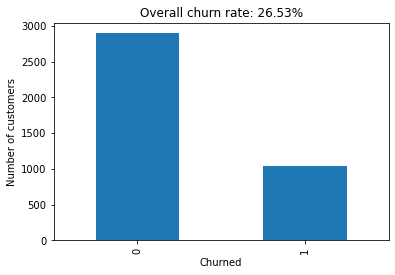

In [8]:
# visualizing overall churn rate
train.churned.value_counts().sort_index().plot.bar()
churn_rate = train.churned.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('Churned')
plt.ylabel('Number of customers')
plt.show()

#### Takeaways:
- Overall churn rate is not very high
- However, we want to explore ways to reduce churn so we can increase customer retention

In [10]:
# Define Categorical variables 
cat_vars = ['payment_type_id','senior_citizen','en_contract_type',
'en_multiple_lines','en_has_fiber','en_has_DSL','has_internet',
'en_online_security','en_online_backup','en_device_protection',
'en_tech_support','en_streaming_tv','en_streaming_movies',
'gender_Male','has_partner','has_dependents','has_phone_service',
'has_paperless_billing','churned']

In [12]:
# Define quantitative variables
quant_vars = ['monthly_charges','total_charges','tenure']

Frequency table of payment_type_id
   payment_type_id  Count  Percent
1                4   1320    33.48
2                3    892    22.62
3                1    879    22.29
4                2    852    21.61


Frequency table of senior_citizen
   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23


Frequency table of en_contract_type
   en_contract_type  Count  Percent
0                 2   2162    54.83
2                 1    974    24.70
1                 0    807    20.47


Frequency table of en_multiple_lines
   en_multiple_lines  Count  Percent
0                  1   2277    57.75
1                  0   1666    42.25


Frequency table of en_has_fiber
   en_has_fiber  Count  Percent
0             0   2203    55.87
1             1   1740    44.13


Frequency table of en_has_DSL
   en_has_DSL  Count  Percent
0           0   2578    65.38
1           1   1365    34.62


Frequency table of has_internet
   has_internet  Count  Percent
1 

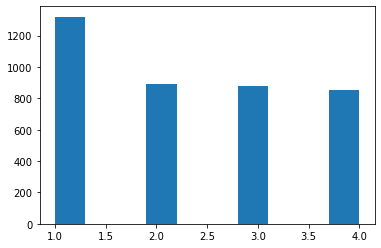

Bar Plot of senior_citizen


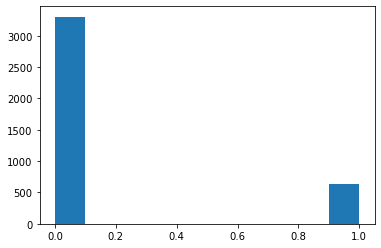

Bar Plot of en_contract_type


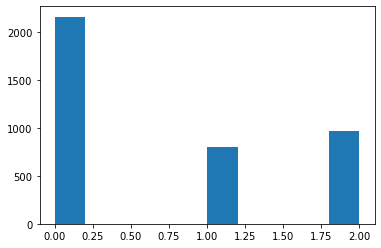

Bar Plot of en_multiple_lines


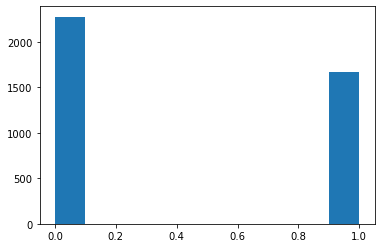

Bar Plot of en_has_fiber


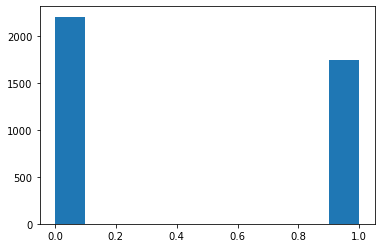

Bar Plot of en_has_DSL


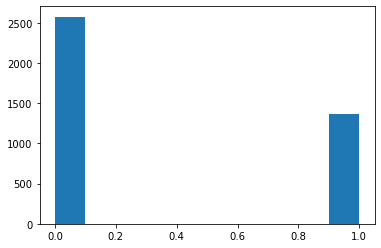

Bar Plot of has_internet


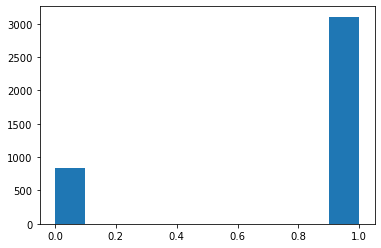

Bar Plot of en_online_security


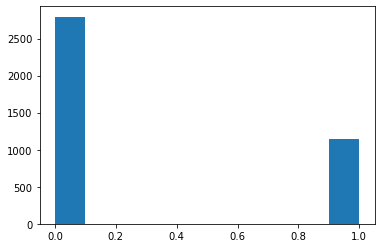

Bar Plot of en_online_backup


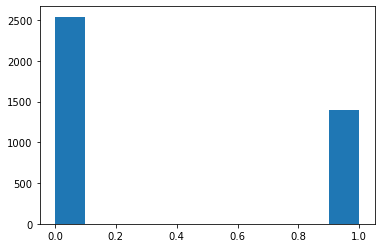

Bar Plot of en_device_protection


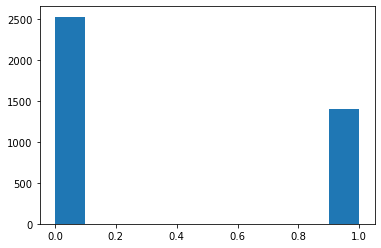

Bar Plot of en_tech_support


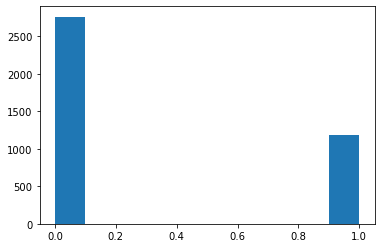

Bar Plot of en_streaming_tv


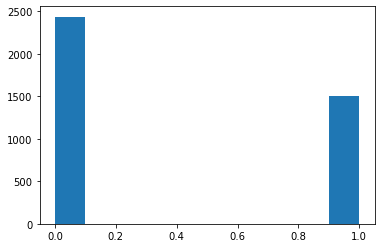

Bar Plot of en_streaming_movies


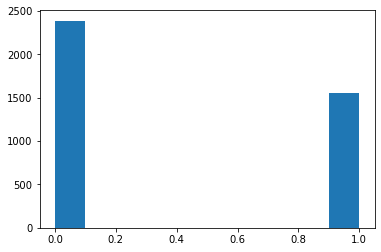

Bar Plot of gender_Male


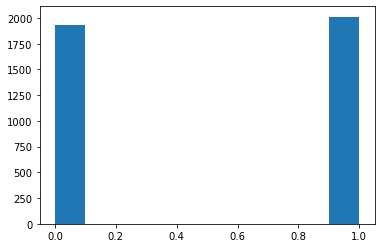

Bar Plot of has_partner


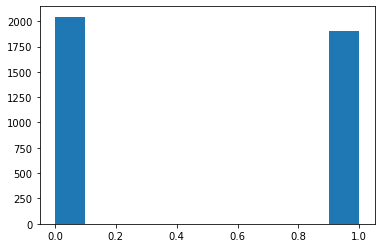

Bar Plot of has_dependents


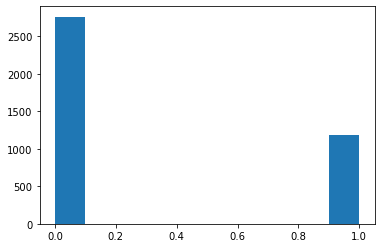

Bar Plot of has_phone_service


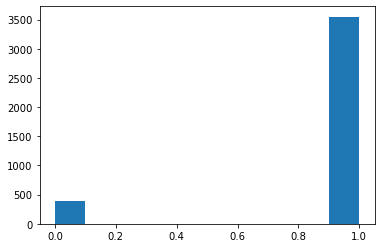

Bar Plot of has_paperless_billing


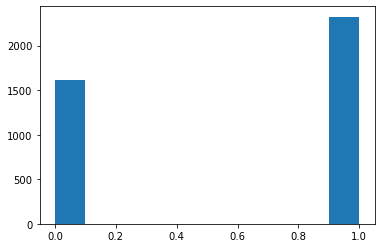

Bar Plot of churned


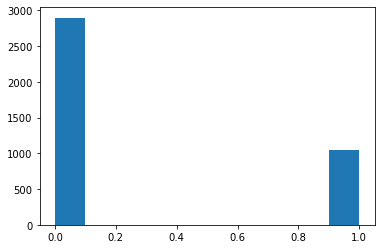

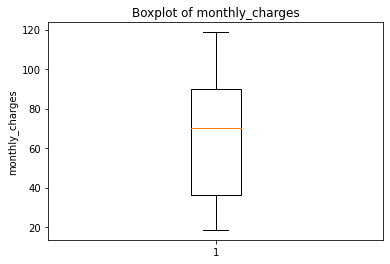

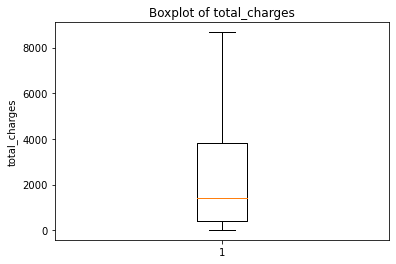

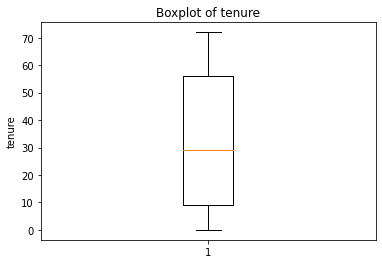

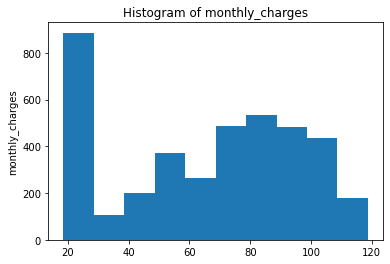

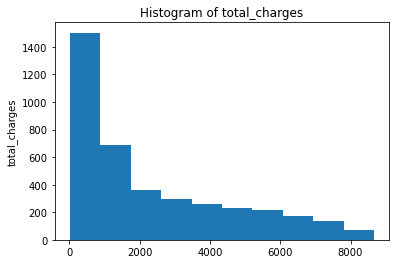

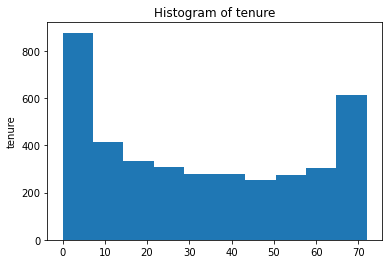

Summary Statistics of monthly_charges
count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


Summary Statistics of total_charges
count    3943.000000
mean     2310.686787
std      2275.714986
min        18.800000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


Summary Statistics of tenure
count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64




In [13]:
explore.explore_univariate(train, cat_vars, quant_vars)

# 33% customers use payment type 4, the rest are quite equal proportions
# 84% cust not senior citizens
# 54% cust have 2 yr contract
# fewest cust have month to month contract
# over 57% cust have multiple lines
# over 55% cust dont have fiber but 44% do
# 34% cust have dsl
# 78% cust dont have internet service
# 71% cust dont have online sec
# 64% cust dont have online_backup
# 64% cust dont have device_protection
# 70% cust dont have tech supp
# 62% cust dont have stream tv
# 61% cust dont have stream movies
# 51% cust are women
# 52% cust have partners
# 70% cust have dependents
# 90% cust have phone service
# 59% cust have paperless bill
# 27% cust churned

   payment_type_id  count  percent
1                4   1320    33.48
2                3    892    22.62
3                1    879    22.29
4                2    852    21.61
-------------------------------


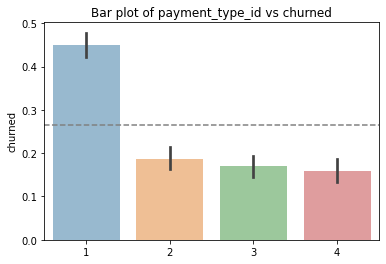

   senior_citizen  count  percent
0               0   3303    83.77
1               1    640    16.23
-------------------------------


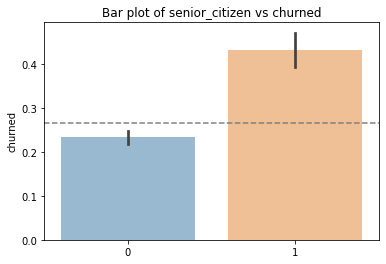

   en_contract_type  count  percent
0                 2   2162    54.83
2                 1    974    24.70
1                 0    807    20.47
-------------------------------


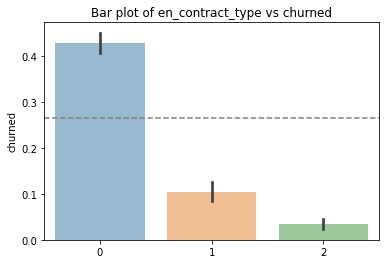

   en_multiple_lines  count  percent
0                  1   2277    57.75
1                  0   1666    42.25
-------------------------------


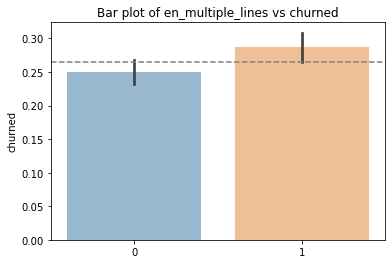

   en_has_fiber  count  percent
0             0   2203    55.87
1             1   1740    44.13
-------------------------------


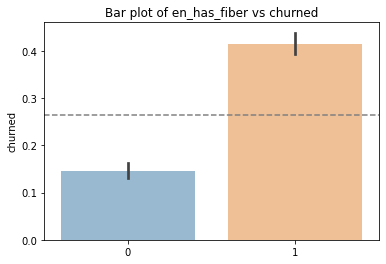

   en_has_DSL  count  percent
0           0   2578    65.38
1           1   1365    34.62
-------------------------------


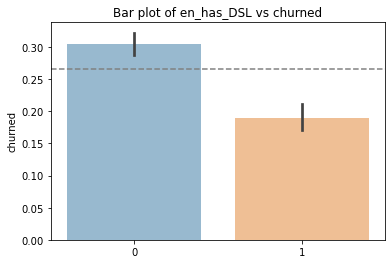

   has_internet  count  percent
1             0   3105    78.75
0             1    838    21.25
-------------------------------


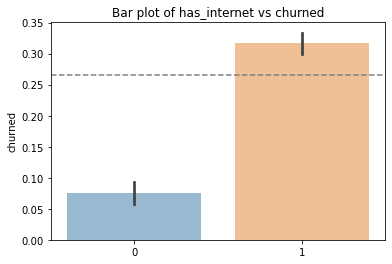

   en_online_security  count  percent
0                   0   2794    70.86
1                   1   1149    29.14
-------------------------------


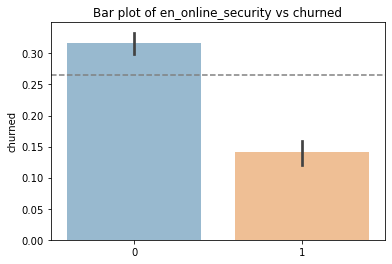

   en_online_backup  count  percent
0                 0   2541    64.44
1                 1   1402    35.56
-------------------------------


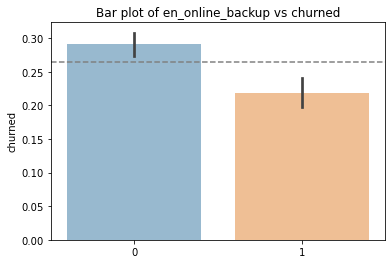

   en_device_protection  count  percent
0                     0   2534    64.27
1                     1   1409    35.73
-------------------------------


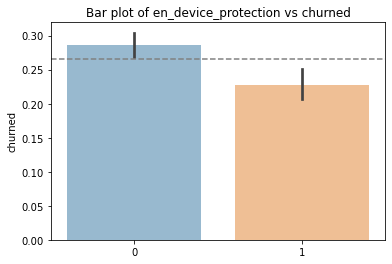

   en_tech_support  count  percent
0                0   2759    69.97
1                1   1184    30.03
-------------------------------


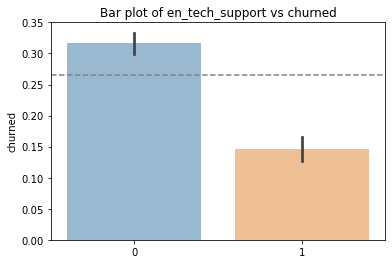

   en_streaming_tv  count  percent
0                0   2435    61.76
1                1   1508    38.24
-------------------------------


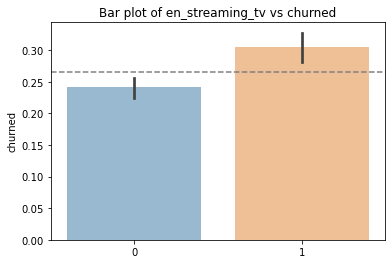

   en_streaming_movies  count  percent
0                    0   2389    60.59
1                    1   1554    39.41
-------------------------------


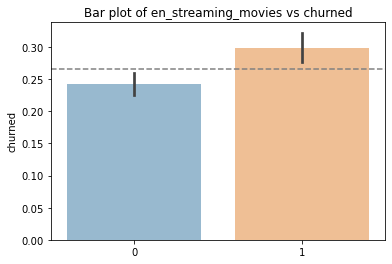

   gender_Male  count  percent
1            0   2013    51.05
0            1   1930    48.95
-------------------------------


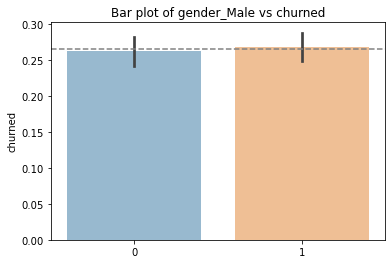

   has_partner  count  percent
0            1   2044    51.84
1            0   1899    48.16
-------------------------------


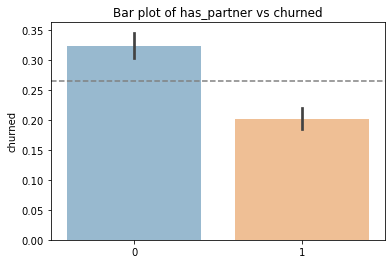

   has_dependents  count  percent
0               1   2764     70.1
1               0   1179     29.9
-------------------------------


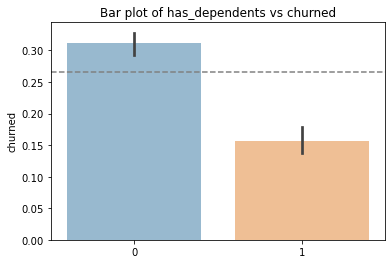

   has_phone_service  count  percent
1                  1   3550    90.03
0                  0    393     9.97
-------------------------------


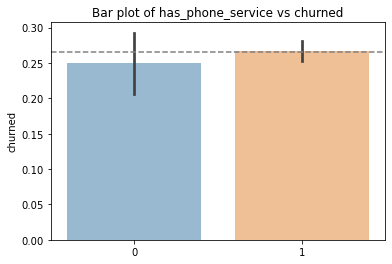

   has_paperless_billing  count  percent
1                      1   2324    58.94
0                      0   1619    41.06
-------------------------------


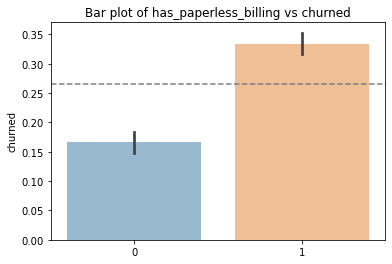

   churned  count  percent
0        0   2897    73.47
1        1   1046    26.53
-------------------------------


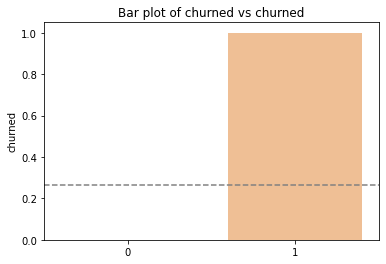

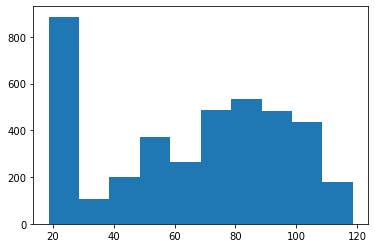

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


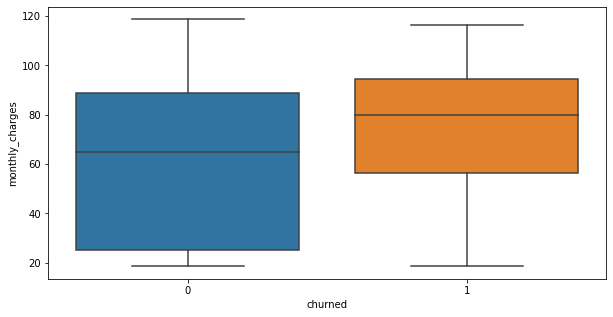

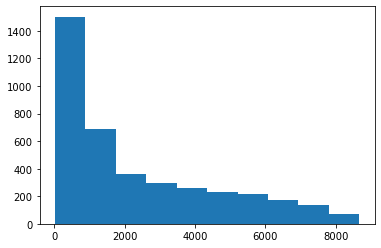

count    3943.000000
mean     2310.686787
std      2275.714986
min        18.800000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


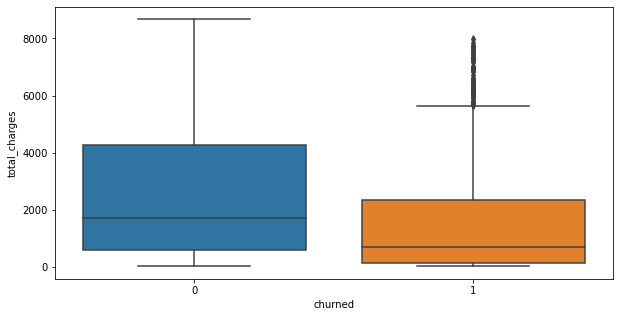

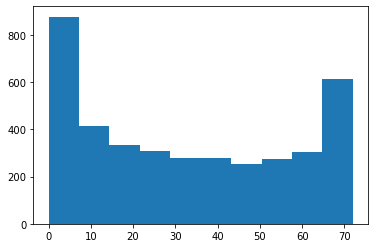

count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


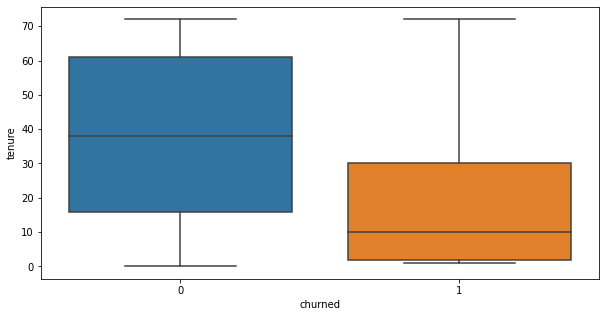

In [14]:
explore.explore_bivariate(train,'churned', cat_vars, quant_vars, alternative_h='two-sided')
# all pmt types except 1 have below avg churn rate
# most cust use pmt type 4
# most cust younger 
# 

### Explore Takeaways:
- 33% customers use payment type 4, the rest are quite equal proportions
- 84% cust not senior citizens
- 54% cust have 2 yr contract
- fewest cust have month to month contract
- over 57% cust have multiple lines
- over 55% cust dont have fiber but 44% do
- 34% cust have dsl
- 78% cust dont have internet service
- 71% cust dont have online sec
- 64% cust dont have online_backup
- 64% cust dont have device_protection
- 70% cust dont have tech supp
- 62% cust dont have stream tv
- 61% cust dont have stream movies
- 51% cust are women
- 52% cust have partners
- 70% cust have dependents
- 90% cust have phone service
- 59% cust have paperless bill
- 27% cust churned

In [15]:
# sr cit
# pmt type
# phone ser
# most cust churn in the first few months
# total charges dist right skewed -  more customers with lower total charges
# from the boxplot looks like customers who churn have higher monthly charges
# 